In [11]:
'''import requests

# Get the data
r = requests.get('https://raw.githubusercontent.com/evgeniiegorov/earthquake/master/data/90-16-jap.csv')

# Save the data
with open("eq_data.csv", 'wb') as f:
    f.write(r.content)
    '''

'import requests\n\n# Get the data\nr = requests.get(\'https://raw.githubusercontent.com/evgeniiegorov/earthquake/master/data/90-16-jap.csv\')\n\n# Save the data\nwith open("eq_data.csv", \'wb\') as f:\n    f.write(r.content)\n    '

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('eq_data.csv', sep=',')

In [13]:
data[0::12000]

year  month  date  hour  minute  seconds      lat      long  depth  \
0       1990      1     1     2      19    5.018  42.2734  144.8460    8.0   
12000   1993      3    18     8      58   40.081  37.5993  137.4577    0.0   
24000   1994      7     7     0      35   52.049  37.0734  141.9623   22.0   
36000   1995      8     9    19       5   20.075  42.3288  139.0553   21.0   
48000   1997      5    28     5       0   49.018  31.9675  131.9727   16.6   
60000   1999      4    24    10      40   10.012  36.3780  141.4850    9.5   
72000   2000      6    28     5      38   12.040  34.1100  139.3700   14.0   
84000   2000      8    15    12      30   34.030  34.1500  139.3100   17.0   
96000   2001      7     4    18      26   57.060  32.2000  139.6900   29.0   
108000  2003      4     2     5      52    7.080  37.2400  140.0800  132.0   
120000  2004      9    12    16      17   53.080  33.1300  137.0000   36.0   
132000  2005     12    25     8      31   54.090  43.5100  146.1000   72.0   
144000  2007     12     1     3      23   10.090  36.0100  141.7600   61.0   
156000  2009      9    12    15       7    8.060  35.8700  140.4700   35.0   
168000  2011      3    14     2      16   55.062  36.5275  142.2029   25.2   
180000  2011      4    17    19      49   15.060  36.8600  140.6800   11.0   
192000  2011      7    14    11      24   31.040  39.6300  143.4700   32.0   
204000  2011     12    16    12       0    9.070  38.3200  142.1100   33.0   
216000  2012      7    11    15      10   32.080  36.0600  141.1100   43.0   
228000  2013      6    15     8      20   37.040  36.7600  141.6800   52.0   
240000  2014     12    14    15       1   25.090  35.9200  141.1300   25.0   

        class  
0         2.9  
12000     2.7  
24000     2.6  
36000     2.9  
48000     3.6  
60000     3.4  
72000     3.0  
84000     2.9  
96000     3.1  
108000    2.5  
120000    2.5  
132000    2.7  
144000    2.5  
156000    2.6  
168000    4.2  
180000    3.1  
192000    2.6  
204000    2.9  
216000    2.7  
228000    3.1  
240000    2.9

<AxesSubplot:xlabel='long', ylabel='lat'>

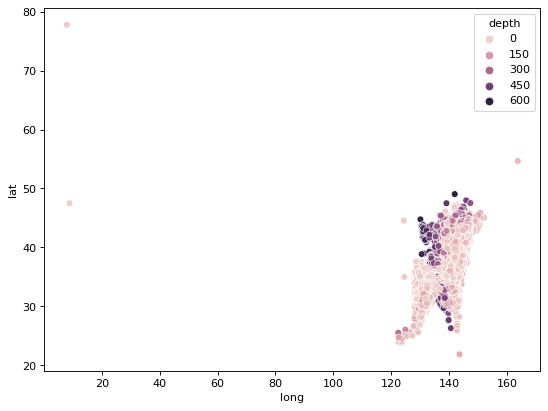

In [14]:
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)

sns.scatterplot(x=data.long, y=data.lat, hue=data.depth)

We notice some outliers and we will get rid of them before further analysis.

In [15]:
df = data.drop(data[(data.long < 100) & (data.lat > 62)].index)

(20.22414, 53.0)

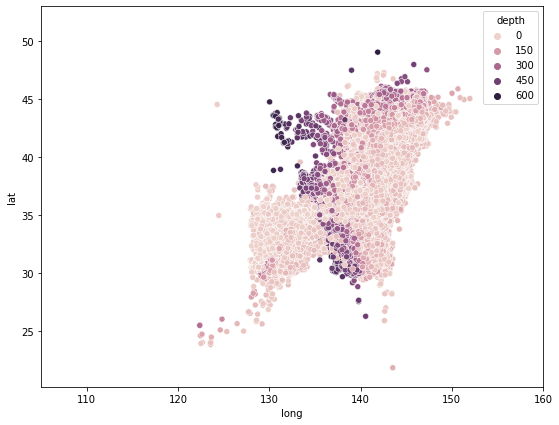

In [16]:
plt.figure(figsize=(9, 7))
sns.scatterplot(x = df.long, y = df.lat, hue = df.depth)
plt.xlim(105, 160)
plt.ylim(top=53)

In [17]:
df.rename({"class": "magnitude"}, axis=1, inplace=True)

(20.22414, 53.0)

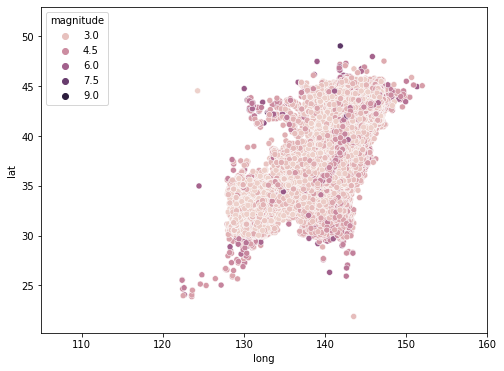

In [18]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x = df.long, y = df.lat, hue = df.magnitude)
plt.xlim(105, 160)
plt.ylim(top=53)

In [19]:
last_9_eq = df[df.year > 2005]

Let's plot earthquake with magnitude > 6

In [20]:
mag_threshold = 6

In [21]:
df_t = df[df.magnitude > mag_threshold]

(25.161455, 53.0)

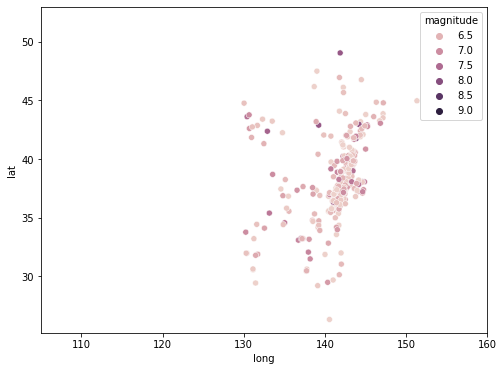

In [22]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x = df_t.long, y = df_t.lat, hue = df_t.magnitude)
plt.xlim(105, 160)
plt.ylim(top=53)

In [23]:
from mpl_toolkits.basemap import Basemap

Web scraping some japanese cities coordinate to plot

In [24]:
url = "https://www.latlong.net/category/cities-111-15.html"

# Extract tables
dfs = pd.read_html(url)

In [25]:
cities = dfs[0]

In [26]:
cities["city"] = cities["Place Name"].apply(lambda row: row.split(",")[0])

In [27]:
cities.head()

Place Name   Latitude   Longitude        city
0                   Nagoya, Chubu, Japan  35.183334  136.899994      Nagoya
1  Kitakyushu, Fukuoka Prefecture, Japan  33.883331  130.883331  Kitakyushu
2       Sendai, Miyagi Prefecture, Japan  38.268223  140.869415      Sendai
3  Hiroshima, Hirosima Prefecture, Japan  34.383331  132.449997   Hiroshima
4   Kawasaki, Kanagawa Prefecture, Japan  35.516666  139.699997    Kawasaki

In [53]:
from matplotlib.patches import Polygon

def draw_screen_poly( lats, lons, m, facecolor='red', alpha=.1):
    x, y = m( lons, lats )
    xy = zip(x,y)
    poly = Polygon( list(xy), facecolor=facecolor, alpha=alpha)
    plt.gca().add_patch(poly)


In [60]:
def plot_map(data, var: str, grid=False, add_cities=False, show_poly=False, show_other=False):
    """val: column name of the variable to plot"""
    fig = plt.figure(figsize=(14, 14))
    #m = Basemap(projection='lcc', resolution=None, lat_1=35.5, lat_2=42, lat_0=38, lon_0=140, width=2.1E6, height=2.1E6,)
    m = Basemap(projection='cyl',llcrnrlat=28,urcrnrlat=48, 
                llcrnrlon=127,urcrnrlon=151)
    m.shadedrelief()
    xpt, ypt = m(data.long, data.lat)
    m.scatter(xpt, ypt, s = data[var].values, c = data[var].values)

    if grid:
        m.drawparallels(np.arange(int(29),int(49),1),labels=[1,0,0,0])
        m.drawmeridians(np.arange(int(128),int(153),1),labels=[0,0,0,1])

    if add_cities:
        xpt,ypt = m(cities.Longitude,cities.Latitude)
        # convert back to lat/lon
        #lonpt, latpt = m(xpt,ypt,inverse=True)
        m.plot(xpt,ypt,'rx')  # plot a blue dot there
        # put some text next to the dot, offset a little bit
        # (the offset is in map projection coordinates)
        #plt.text(xpt+100000,ypt+100000, cities.city)

    if show_poly:
        # polygon not defined in map coordinate
        lats = [30, 46, 46, 30]
        lons = [129, 129, 149, 149]
        
        # polygon in map coordinates
        #lats = np.linspace(30, 47, 40)
        #lons = np.linspace(129, 150, 40)
        draw_screen_poly(lats, lons, m)

    if show_other:
        # rectangle haut gauche
        latsA = [39, 46, 46, 39]
        lonsA = [129, 129, 137, 137]
        draw_screen_poly(latsA, lonsA, m, "grey", .4)

        # rectangle bas droit
        latsB = [30, 35, 35, 30]
        lonsB = [144, 144, 149, 149]
        draw_screen_poly(latsB, lonsB, m, "grey", .4)

        # rectangle milieu droit
        latsC = [35, 41, 41, 35]
        lonsC = [146, 146, 149, 149]
        draw_screen_poly(latsC, lonsC, m, "grey", .4)

    plt.plot()

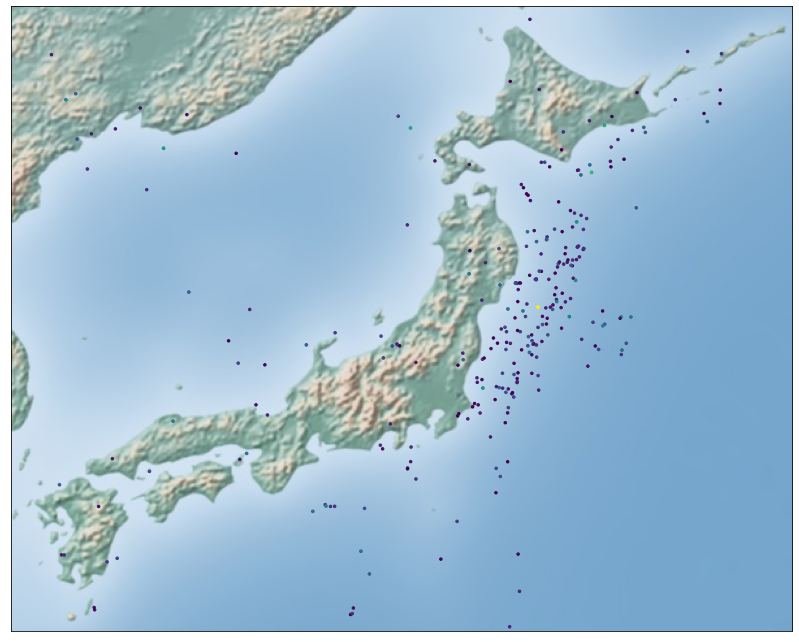

In [30]:
plot_map(df_t, "magnitude")

In [31]:
len(df_t)

287

In [32]:
df_t_5 = df[df.magnitude >= 5]

In [33]:
len(df_t_5)

2387

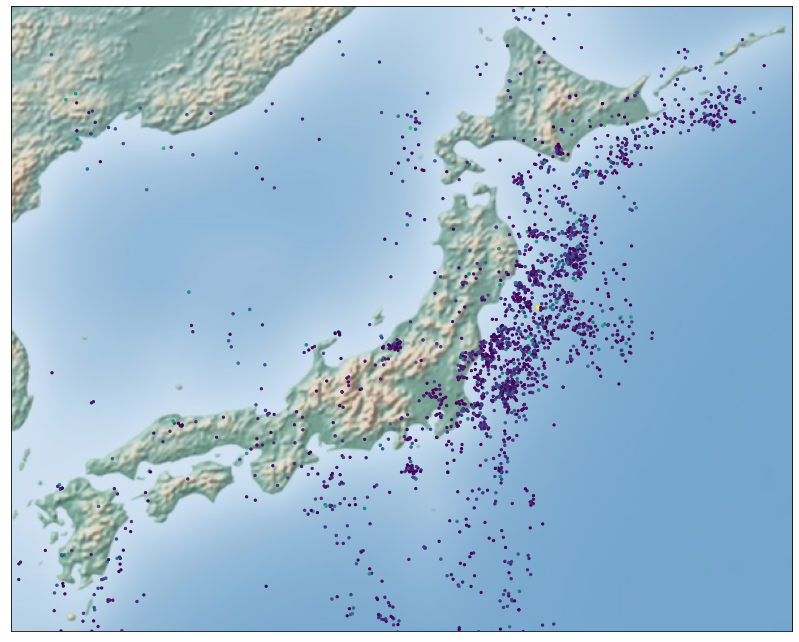

In [34]:
plot_map(df_t_5, "magnitude")

<AxesSubplot:xlabel='magnitude', ylabel='Density'>

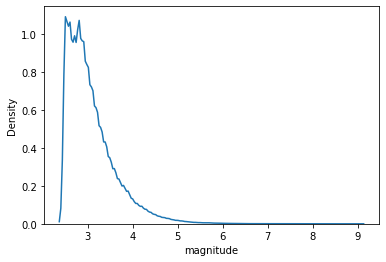

In [35]:
sns.kdeplot(df.magnitude, data=df)

<AxesSubplot:xlabel='depth', ylabel='Density'>

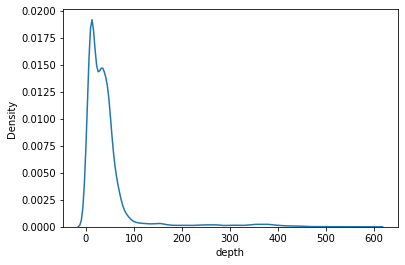

In [36]:
sns.kdeplot(df.depth, data=df)

Le problème est qu'il y a une grosse asymètrie entre sinistres à faible magnitude et à forte magnitude. Il faudra prendre cela en compte lors de la mesure de performance du réseaux de neurones.

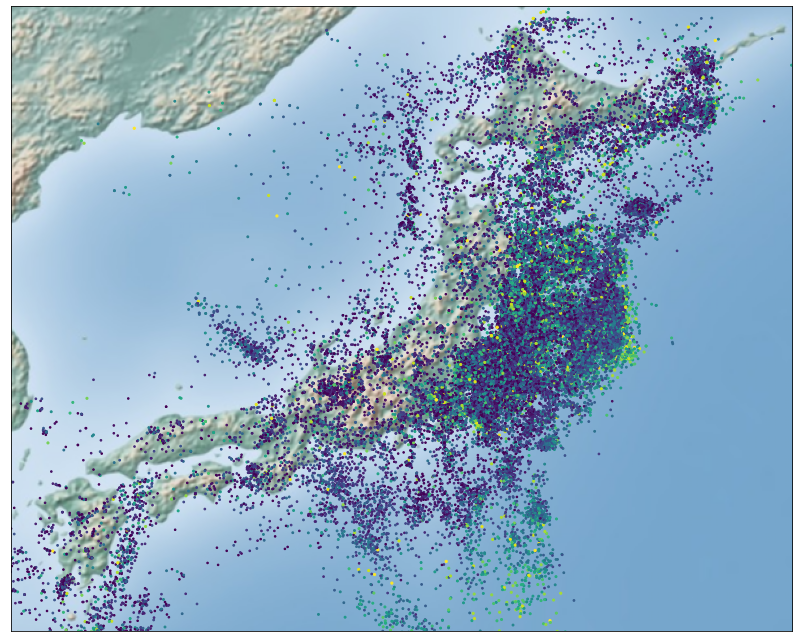

In [37]:
plot_map(df[(df.magnitude < 5) & (df.year > 2009)], "magnitude")

De plus, la plupart des tremblements de terre à faible magnitude sont sur le continent alors que la plupart des tremblements de terre à forte magnitude ont leur épicentre en mer.

## Diviser en zones

[]

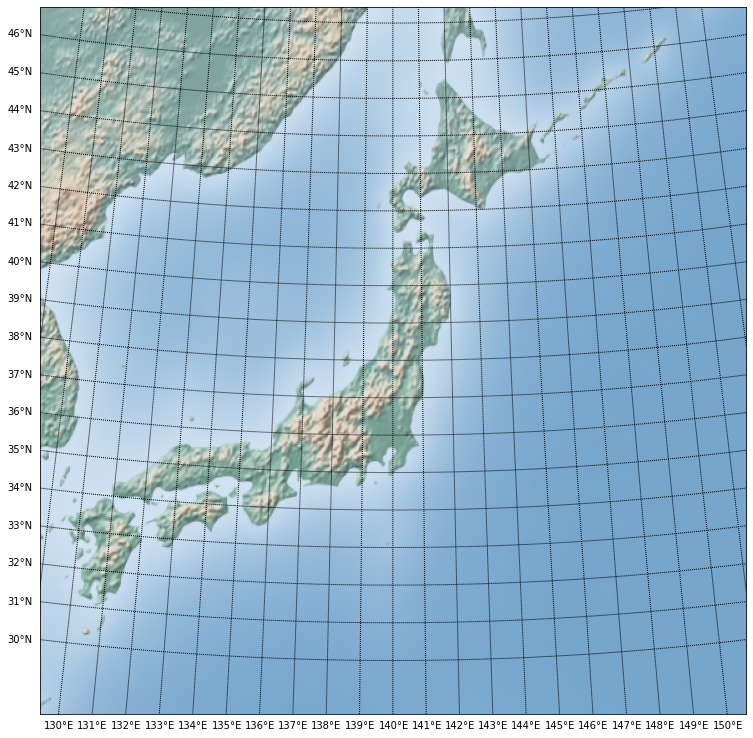

In [41]:
fig = plt.figure(figsize=(13, 13))
m = Basemap(projection='lcc', resolution=None, lat_1=35.5, lat_2=42, lat_0=38, lon_0=140, width=2.1E6, height=2.1E6,)
m.shadedrelief()
m.drawparallels(np.arange(int(30),int(49),1),labels=[1,0,0,0])
m.drawmeridians(np.arange(int(128),int(153),1),labels=[0,0,0,1])
plt.plot()

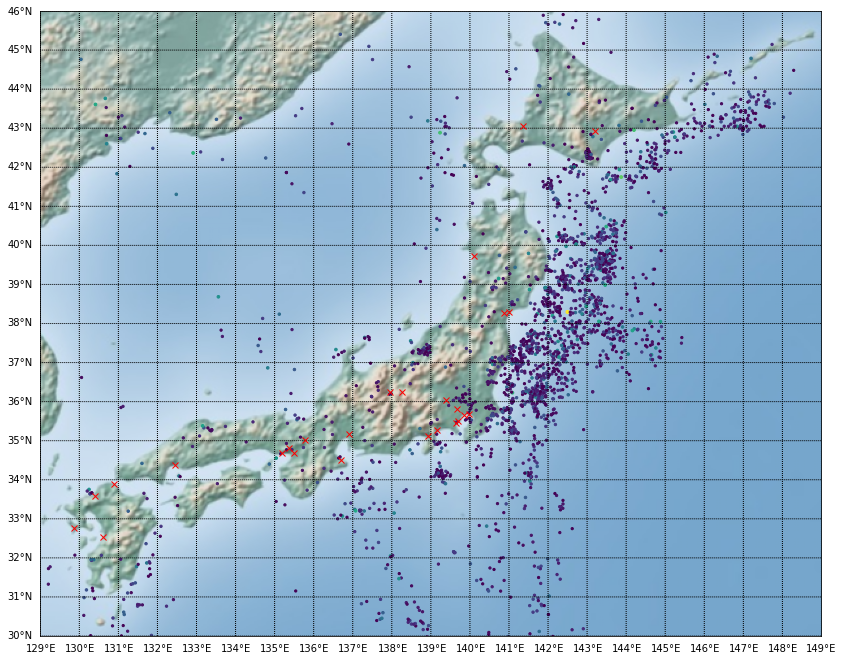

In [42]:
plot_map(df_t_5, "magnitude", grid=True, add_cities=True)

A première vue, il semblerait judicieux de prendre  
* Longitude : de 129°E à 149°E
* Latitude : de 30°N à 46°N

Cela donne une grille de 16 x 20, soit des matrices à 320 colonnes.  
Soit $x_t \in \mathbb{R}^{320 \times n_f}$, avec $n_f$ le nombre de features utilisées (magnitude, profondeur)

Beaucoup de zones seront à supprimer, notamment celles "en bas à droite" et "en haut à gauche".

Comparons ça avec des magnitudes plus faibles. Le carrée rouge représente la zoné d'étude avant amélioration.

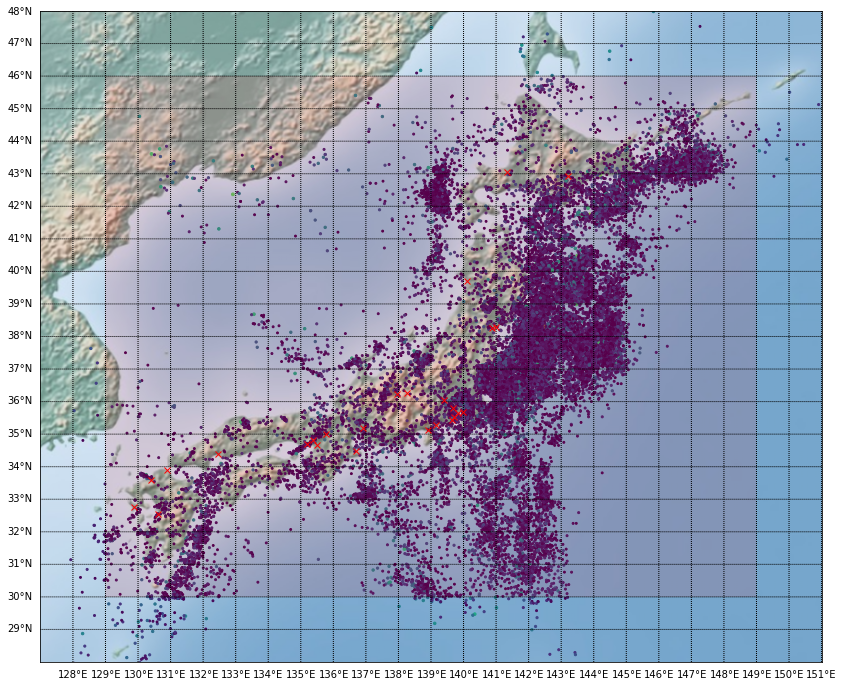

In [52]:
plot_map(df[df.magnitude > 3.5], "magnitude", grid=True, add_cities=True, show_poly=True)

L'idée va être de réduire le nombre de zones en ne prenant pas en compte les zones suivantes grisées:

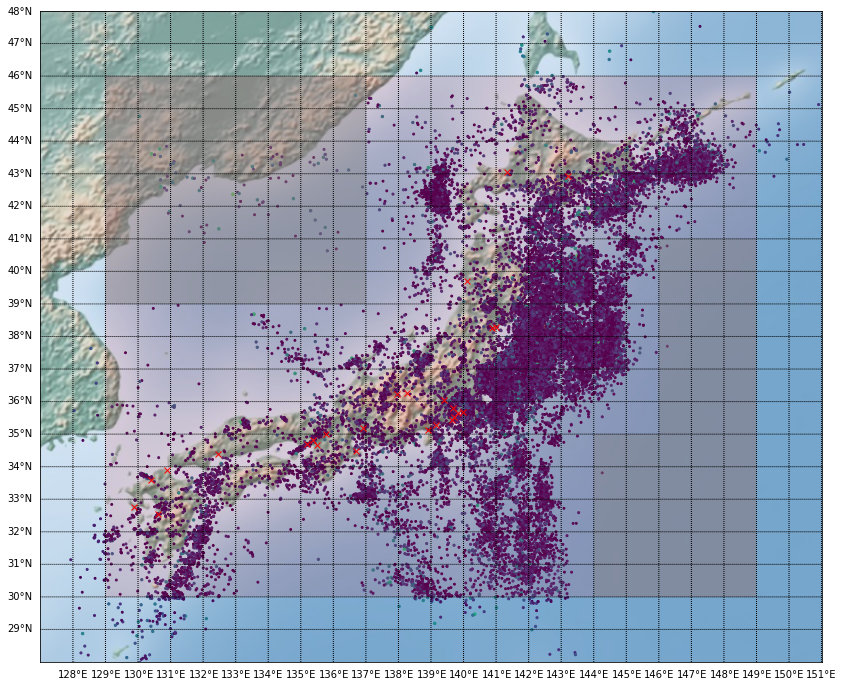

In [61]:
plot_map(df[df.magnitude > 3.5], "magnitude", grid=True, add_cities=True, show_poly=True, show_other=True)

On arrive à réduire le nombre de zone de 99, soit un nombre de zone total de 221.